In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_oil = pd.read_csv('oil.csv')
df_holidays_events = pd.read_csv('holidays_events.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')
df_stores = pd.read_csv('stores.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_transactions = pd.read_csv('transactions.csv')


In [3]:
print(df_oil.head(1000))

           date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
..          ...         ...
995  2016-10-25       49.45
996  2016-10-26       48.75
997  2016-10-27       49.71
998  2016-10-28       48.72
999  2016-10-31       46.83

[1000 rows x 2 columns]


In [4]:
print(df_holidays_events.head())

         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


In [5]:
print(df_sample_submission.head())

        id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0


In [6]:
print(df_stores.head())

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4


In [7]:
print(df_test.head())

        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0


In [33]:
print(df_train.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [9]:
print(df_transactions.head())

         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922


In [82]:
# label encoding categorical variables
le = LabelEncoder()
df_holidays_events['type_enc'] = le.fit_transform(df_holidays_events['type'])
df_holidays_events['locale_enc'] = le.fit_transform(df_holidays_events['locale'])
df_holidays_events['locale_name_enc'] = le.fit_transform(df_holidays_events['locale_name'])
df_holidays_events['description_enc'] = le.fit_transform(df_holidays_events['description'])
df_holidays_events['transferred_enc'] = le.fit_transform(df_holidays_events['transferred'])

df_stores['city_enc'] = le.fit_transform(df_stores['city'])
df_stores['state_enc'] = le.fit_transform(df_stores['state'])
df_stores['type_enc'] = le.fit_transform(df_stores['type'])

df_test['family_enc'] = le.fit_transform(df_test['family'])
df_train['family_enc'] = le.fit_transform(df_train['family'])

df_train.head()

,id,date,store_nbr,family,sales,onpromotion,family_enc
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2
3,3,2013-01-01,1,BEVERAGES,0.0,0,3
4,4,2013-01-01,1,BOOKS,0.0,0,4


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   family_enc   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 160.3+ MB


In [31]:
# extracting encoding labels for future reference
type_labels = df_holidays_events[['type', 'type_enc']].drop_duplicates().sort_values('type_enc')
locale_labels = df_holidays_events[['locale', 'locale_enc']].drop_duplicates().sort_values('locale_enc')
locale_name_labels = df_holidays_events[['locale_name', 'locale_name_enc']].drop_duplicates().sort_values('locale_name_enc')
description_labels = df_holidays_events[['description', 'description_enc']].drop_duplicates().sort_values('description_enc')
transferred_labels = df_holidays_events[['transferred', 'transferred_enc']].drop_duplicates().sort_values('transferred_enc')
locale_name_labels.head()

,locale_name,locale_name_enc
16,Ambato,0
12,Cayambe,1
1,Cotopaxi,2
2,Cuenca,3
14,Ecuador,4


In [10]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
# df_train['date'] = pd.to_datetime(df_train['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [61]:
print(df_oil.isnull().sum())
print(df_holidays_events.isnull().sum())
print(df_sample_submission.isnull().sum())
print(df_stores.isnull().sum())
print(df_test.isnull().sum())
print(df_train.isnull().sum())
print(df_transactions.isnull().sum())

date                 0
dcoilwtico           0
Prev_Amount         44
Next_Amount         43
Median_Prev_Next     0
dtype: int64
date               0
type               0
locale             0
locale_name        0
description        0
transferred        0
type_enc           0
locale_enc         0
locale_name_enc    0
description_enc    0
transferred_enc    0
dtype: int64
id       0
sales    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
city_enc     0
state_enc    0
type_enc     0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
family_enc     0
dtype: int64
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
family_enc     0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64


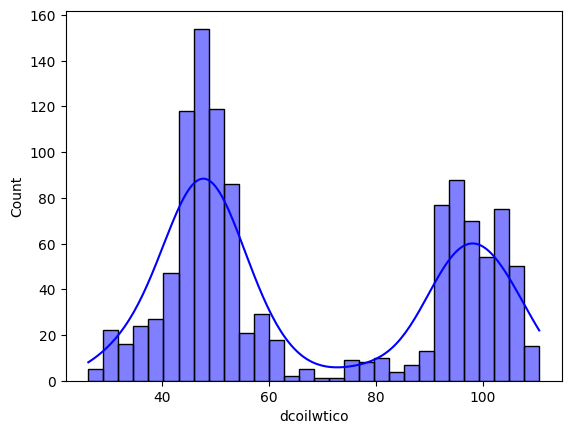

In [12]:
sns.histplot(df_oil["dcoilwtico"], bins=30, kde=True, color='blue')
plt.show()

In [13]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [46]:
import numpy as np
import pandas as pd

# Calculate median of preceding and following values
df_oil['Prev_Amount'] = df_oil['dcoilwtico'].shift(1)
df_oil['Next_Amount'] = df_oil['dcoilwtico'].shift(-1)

# Calculate the median
df_oil['Median_Prev_Next'] = df_oil[['Prev_Amount', 'Next_Amount']].median(axis=1)

# Fill null values in 'Amount' column with the calculated medians
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(df_oil['Median_Prev_Next'])

# Drop unnecessary columns
df_oill = df_oil.drop(['Prev_Amount', 'Next_Amount', 'Median_Prev_Next'], axis=1)

# Display the DataFrame
print(df_oill)


            date  dcoilwtico
0     2013-01-01       93.14
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1218 rows x 2 columns]


In [84]:
# Merge df_oil and df_holidays_events on 'date' with df_train
merged_table1 = pd.merge(df_train, df_oil, on='date', how='left')
merged_table2 = pd.merge(merged_table1, df_holidays_events, on='date', how='left')

# Merge with df_transactions on 'date' with df_train
merged_table3 = pd.merge(merged_table2, df_transactions, on='date', how='left')

# # Merge with df_stores on 'date' with df_train
# merged_table4 = pd.merge(merged_table3, df_stores, on='store_nbr', how='left')

# # Merge df_test with df_train on 'date'
# merged_table5 = pd.merge(df_test, df_train, on='date', how='left')

# # Merge the result with df_sample_submission on 'id'
# final_merged_table = pd.merge(merged_table4, merged_table5, on='id', how='left')

# Display the first few rows of the final merged table
print(merged_table3)
# num_records = merged_table2.shape[0]
# print("Number of records in the final merged table:", num_records)


In [63]:
print("df_oil columns:", df_oil.columns)
print("df_holidays_events columns:", df_holidays_events.columns)
print("df_sample_submission columns:", df_sample_submission.columns)
print("df_stores columns:", df_stores.columns)
print("df_test columns:", df_test.columns)
print("df_train columns:", df_train.columns)
print("df_transactions columns:", df_transactions.columns)


df_oil columns: Index(['date', 'dcoilwtico', 'Prev_Amount', 'Next_Amount', 'Median_Prev_Next'], dtype='object')
df_holidays_events columns: Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred',
       'type_enc', 'locale_enc', 'locale_name_enc', 'description_enc',
       'transferred_enc'],
      dtype='object')
df_sample_submission columns: Index(['id', 'sales'], dtype='object')
df_stores columns: Index(['store_nbr', 'city', 'state', 'type', 'cluster', 'city_enc',
       'state_enc', 'type_enc'],
      dtype='object')
df_test columns: Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'family_enc'], dtype='object')
df_train columns: Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'family_enc'],
      dtype='object')
df_transactions columns: Index(['date', 'store_nbr', 'transactions'], dtype='object')


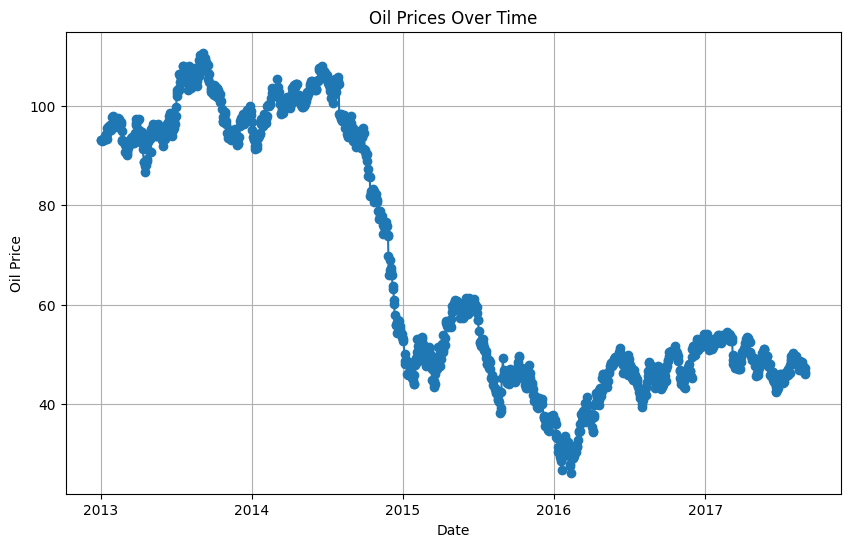

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], marker='o', linestyle='-')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()

In [16]:
# performing train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

NameError: name 'train_test_split' is not defined